# clean census data and add states abbr

In [36]:
import pandas as pd
import re
import time
import matplotlib.pyplot as plt

In [5]:
# import census data
path="../data/Population_census.csv"
census_df = pd.read_csv(path)

In [6]:
# census_df # debug print

In [7]:
# census_df['Geographic Area'][0] # check spaces

In [8]:
# split state and city
#start = time.time()
census_df[['City','State']]=census_df['Geographic Area'].str.split(", ", n = 1, expand = True) 
#end = time.time()
#print(end - start)  
#census_df # debug print

In [9]:
# create states postal abbreviations dataframe
states_df=pd.DataFrame()
states = {'Alaska': 'AK', 'Alabama': 'AL', 'Arkansas': 'AR', 'American Samoa': 'AS', 'Arizona': 'AZ', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'District of Columbia': 'DC', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Guam': 'GU', 'Hawaii': 'HI', 'Iowa': 'IA', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Massachusetts': 'MA', 'Maryland': 'MD', 'Maine': 'ME', 'Michigan': 'MI', 'Minnesota': 'MN', 'Missouri': 'MO', 'Northern Mariana Islands': 'MP', 'Mississippi': 'MS', 'Montana': 'MT', 'National': 'NA', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Nebraska': 'NE', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'Nevada': 'NV', 'New York': 'NY', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Puerto Rico': 'PR', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Virginia': 'VA', 'Virgin Islands': 'VI', 'Vermont': 'VT', 'Washington': 'WA', 'Wisconsin': 'WI', 'West Virginia': 'WV', 'Wyoming': 'WY'}
states_df['State']=states.keys()
states_df['State Abbr']=states.values()
# states_df # debug print

In [10]:
# merge State Abbr to census data
census_state_df=census_df.merge(states_df, how="left",on='State')
#census_state_df # debug print

In [11]:
# cleaning up city names
# removing "city" from the left
census_city_df=census_state_df.copy()
census_city_df['City Short']=census_state_df['City'].apply(lambda x:x[:-5]).copy()
# split '(' and '_' and remove them
census_city_df['City Short']=census_city_df['City Short'].str.split("(", n = 1, expand = True)[0]
census_city_df['City Short']=census_city_df['City Short'].str.split("-", n = 1, expand = True)[0]
census_city_df['City Short']=census_city_df['City Short'].str.split("/", n = 1, expand = True)[0]
# census_city_df # debug print

In [12]:
# coverting 2017 2018 2019 data to int type to get avarage population
#start=time.time()
pop2017=census_city_df['2017'].apply(lambda x:x.replace(',','')).astype(int, copy=True, errors='raise')
pop2018=census_city_df['2018'].apply(lambda x:x.replace(',','')).astype(int, copy=True, errors='raise')
pop2019=census_city_df['2019'].apply(lambda x:x.replace(',','')).astype(int, copy=True, errors='raise')
average_pop=((pop2017+pop2018+pop2019)/3).round(decimals=0)
#end=time.time()
#print(end-start)
#average_pop # debug print

In [13]:
# re-arrange final Data Frame
clean_census_df=pd.DataFrame()
clean_census_df[['State','State Abbr','City']]=census_city_df[['State','State Abbr','City Short']].copy()
clean_census_df['Average Population']=average_pop.copy()
clean_census_df[['2017','2018','2019','Geographic Area']]=census_city_df[['2017','2018','2019','Geographic Area']].copy()
clean_census_df

,State,State Abbr,City,Average Population,2017,2018,2019,Geographic Area
0,New York,NY,New York,8388125.0,"8,437,478","8,390,081","8,336,817","New York city, New York"
1,California,CA,Los Angeles,3977653.0,"3,975,788","3,977,596","3,979,576","Los Angeles city, California"
2,Illinois,IL,Chicago,2702156.0,"2,711,069","2,701,423","2,693,976","Chicago city, Illinois"
3,Texas,TX,Houston,2318530.0,"2,316,750","2,318,573","2,320,268","Houston city, Texas"
4,Arizona,AZ,Phoenix,1656409.0,"1,633,560","1,654,675","1,680,992","Phoenix city, Arizona"
...,...,...,...,...,...,...,...,...
783,Ohio,OH,Lakewood,49967.0,"50,211","50,012","49,678","Lakewood city, Ohio"
784,New York,NY,Troy,49314.0,"49,433","49,354","49,154","Troy city, New York"
785,Michigan,MI,Saginaw,48374.0,"48,696","48,310","48,115","Saginaw city, Michigan"
786,New York,NY,Niagara Falls,47994.0,"48,249","48,012","47,720","Niagara Falls city, New York"


In [14]:
# creating Texas subset
texas_city_df=clean_census_df.loc[census_city_df['State Abbr']=='TX']
texas_city_df

,State,State Abbr,City,Average Population,2017,2018,2019,Geographic Area
3,Texas,TX,Houston,2318530.0,"2,316,750","2,318,573","2,320,268","Houston city, Texas"
6,Texas,TX,San Antonio,1529474.0,"1,511,154","1,530,016","1,547,253","San Antonio city, Texas"
8,Texas,TX,Dallas,1342618.0,"1,342,479","1,341,802","1,343,573","Dallas city, Texas"
10,Texas,TX,Austin,964310.0,"951,553","962,469","978,908","Austin city, Texas"
12,Texas,TX,Fort Worth,892537.0,"874,809","893,216","909,585","Fort Worth city, Texas"
...,...,...,...,...,...,...,...,...
733,Texas,TX,Little Elm,49586.0,"45,988","49,644","53,126","Little Elm city, Texas"
736,Texas,TX,Wylie,51202.0,"49,536","51,003","53,067","Wylie city, Texas"
738,Texas,TX,DeSoto,53258.0,"53,533","53,254","52,988","DeSoto city, Texas"
773,Texas,TX,Galveston,50470.0,"50,569","50,396","50,446","Galveston city, Texas"


In [17]:
#write to csv
clean_census_df.to_csv('../data/YK_census_city.csv',index=False)
texas_city_df.to_csv('../data/YK_texas_city.csv', index=False)

In [19]:
# getting county Data
path="../data/texas_county_pop.csv"
tx_county_pop_df = pd.read_csv(path)
tx_county_pop_df

,County,Population
0,Harris County,"4,646,630"
1,Dallas County,"2,606,868"
2,Tarrant County,"2,049,770"
3,Bexar County,"1,952,843"
4,Travis County,"1,226,805"
...,...,...
249,Kenedy County,568
250,King County,237
251,Loving County,98
252,Andrews County,18036


In [20]:
# cleanup county name 
tx_county_pop_df['County']=tx_county_pop_df['County'].apply(lambda x:x[:-7])

In [60]:
tx_county_pop_df.head(10)

,County,Population
0,Harris,"4,646,630"
1,Dallas,"2,606,868"
2,Tarrant,"2,049,770"
3,Bexar,"1,952,843"
4,Travis,"1,226,805"
5,Collin,"973,977"
6,Hidalgo,"855,176"
7,El Paso,"836,062"
8,Denton,"833,822"
9,Fort Bend,"765,394"


In [28]:
# create csv file 
tx_county_pop_df.to_csv('../data/YK_texas_county_pop.csv', index=False)

In [24]:
# getting States Data
path="data/States_pop_2019.csv"
input_pop_df = pd.read_csv(path)
input_pop_df.head()

,State,2019
0,.Alabama,"4,903,185"
1,.Alaska,"731,545"
2,.Arizona,"7,278,717"
3,.Arkansas,"3,017,804"
4,.California,"39,512,223"


In [29]:
# cleanup state name and make population int
pop_df=input_pop_df.copy()
pop_df['State']=input_pop_df['State'].apply(lambda x:x[1:])
#print(type(states_pop_df['2019'][0]))
pop_df['2019']=input_pop_df['2019'].apply(lambda x:x.replace(',','')).astype(int, copy=True, errors='raise')
#merge State Abbr to census data
states_pop_df=pd.DataFrame()
states_pop_df=pop_df.merge(states_df, how="left",on='State')

In [30]:
states_pop_df

,State,2019,State Abbr
0,Alabama,4903185,AL
1,Alaska,731545,AK
2,Arizona,7278717,AZ
3,Arkansas,3017804,AR
4,California,39512223,CA
5,Colorado,5758736,CO
6,Connecticut,3565287,CT
7,Delaware,973764,DE
8,District of Columbia,705749,DC
9,Florida,21477737,FL


In [32]:
# create csv file 
states_pop_df.to_csv('../data/YK_states_pop.csv', index=False)

In [49]:
plot_data=states_pop_df[['State Abbr', '2019']].sort_values('2019',ascending=False, ignore_index=True)
plot_data

,State Abbr,2019
0,CA,39512223
1,TX,28995881
2,FL,21477737
3,NY,19453561
4,PA,12801989
5,IL,12671821
6,OH,11689100
7,GA,10617423
8,NC,10488084
9,MI,9986857


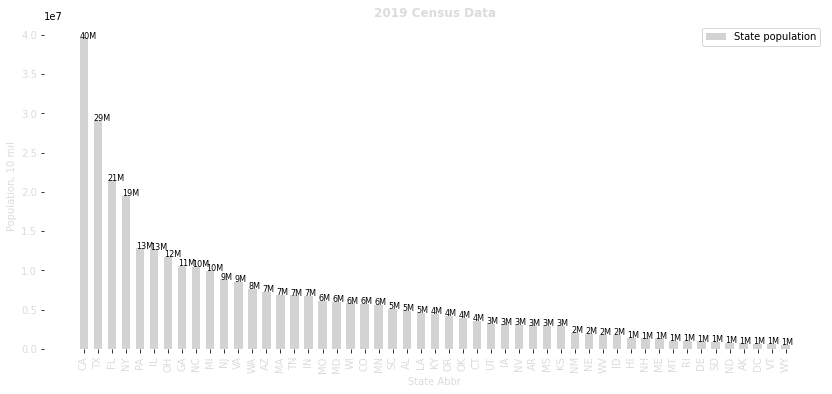

In [59]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 14
fig_size[1] = 6
plot1= plt.subplot(111)
plot1.spines["top"].set_visible(False)    
plot1.spines["bottom"].set_visible(False)    
plot1.spines["right"].set_visible(False)    
plot1.spines["left"].set_visible(False)
color_t='gainsboro'
x_label=plot_data.columns[0]
y_label='Population, 10 mil'
plt.ylabel(y_label, color=color_t)
plt.xlabel(x_label, color=color_t)
plt.xticks(rotation=90)
x=plot_data['State Abbr']
y=plot_data['2019']
plt.yticks( color=color_t,fontsize=10)    
plt.xticks(color=color_t,fontsize=10)
plt.title('2019 Census Data',color=color_t,fontweight="bold")
plot1=plt.bar(x,y,
              color="lightgrey",
              label='State population',
              width=0.6)



for i in plot_data.index:
    y=plot_data['2019'][i]
    ft_sz=8
    plt.text(x=i-.3
             , y=y , s=f"{y/1000000:,.0f}M" , fontdict=dict(fontsize=ft_sz))
plt.legend(loc='upper right')
plt.show
plt.savefig('../Analysis/output/YK_US_States_Census_bar_plt.png', facecolor='dimgray')